# Mouse embryo reference atlas - trajectories and PAGA

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [43]:
sc.set_figure_params(dpi_save=320,format='tiff')
sc.settings.autosave=True

In [3]:
rds_path = '../../../../scRNAseq_Ranalysis/Seurat_v3/Embryos/published_data/v3/embryo_seurat.rds'

In [32]:
%%R -i rds_path -o adata

adata = readRDS(rds_path)

In [18]:
# Loading previously saved object
adata = sc.read_h5ad(results_file)

In [33]:
adata

AnnData object with n_obs × n_vars = 100000 × 21117 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell', 'stage', 'sequencing.batch', 'celltype', 'percent.mt', 'sample', 'all_exon', 'all_intron', 'all_reads', 'unmatched_rate', 'Size_Factor', 'id', 'sex', 'extraction_date', 'day', 'Total_mRNAs', 'tsne_1', 'tsne_2', 'Cluster', 'num_genes_expressed', 'sub_tsne_1', 'sub_tsne_2', 'sub_Cluster', 'louvain_component', 'Trajectory', 'sub_cluster_id', 'Main_trajectory', 'Sub_trajectory_name', 'cell_type', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'celltype_old', 'ident'
    obsm: 'X_pca', 'X_umap'

In [8]:
results_file = './write/embryo_scanpy.h5ad'

### Calculate graphs

In [35]:
sc.pp.neighbors(adata)

sc.tl.diffmap(adata)
#sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:33)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9997747  0.9996913  0.99952364 0.998396   0.9981305
     0.9978638  0.99762875 0.9965581  0.9961108  0.99601024 0.9953509
     0.99527425 0.9943626  0.99407595]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:21)


In [9]:
adata.write(results_file)

... storing 'orig.ident' as categorical
... storing 'cell' as categorical
... storing 'stage' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'day' as categorical
... storing 'sub_Cluster' as categorical
... storing 'louvain_component' as categorical
... storing 'Trajectory' as categorical
... storing 'sub_cluster_id' as categorical
... storing 'Main_trajectory' as categorical
... storing 'Sub_trajectory_name' as categorical
... storing 'cell_type' as categorical
... storing 'celltype_old' as categorical


In [13]:
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

In [34]:
adata.obs.dtypes

orig.ident                 object
nCount_RNA                float64
nFeature_RNA                int32
cell                       object
stage                      object
sequencing.batch            int32
celltype                   object
percent.mt                float64
sample                     object
all_exon                  float64
all_intron                float64
all_reads                 float64
unmatched_rate            float64
Size_Factor               float64
id                          int32
sex                        object
extraction_date             int32
day                        object
Total_mRNAs               float64
tsne_1                    float64
tsne_2                    float64
Cluster                   float64
num_genes_expressed         int32
sub_tsne_1                float64
sub_tsne_2                float64
sub_Cluster                object
louvain_component          object
Trajectory                 object
sub_cluster_id             object
Main_trajector

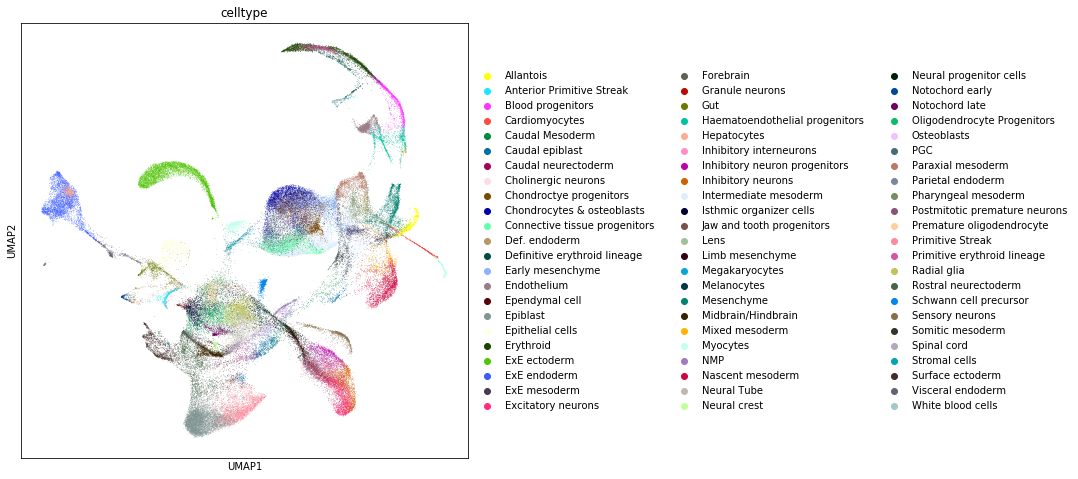

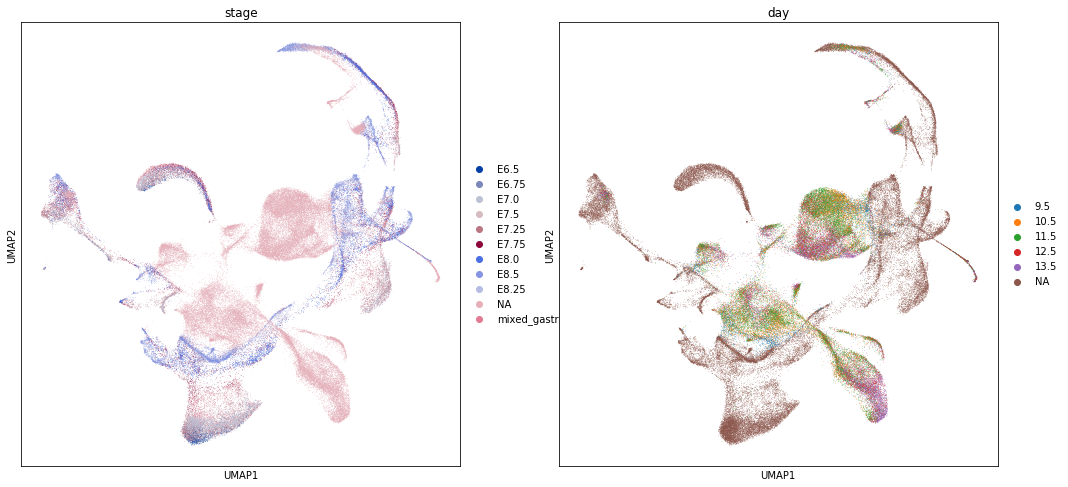

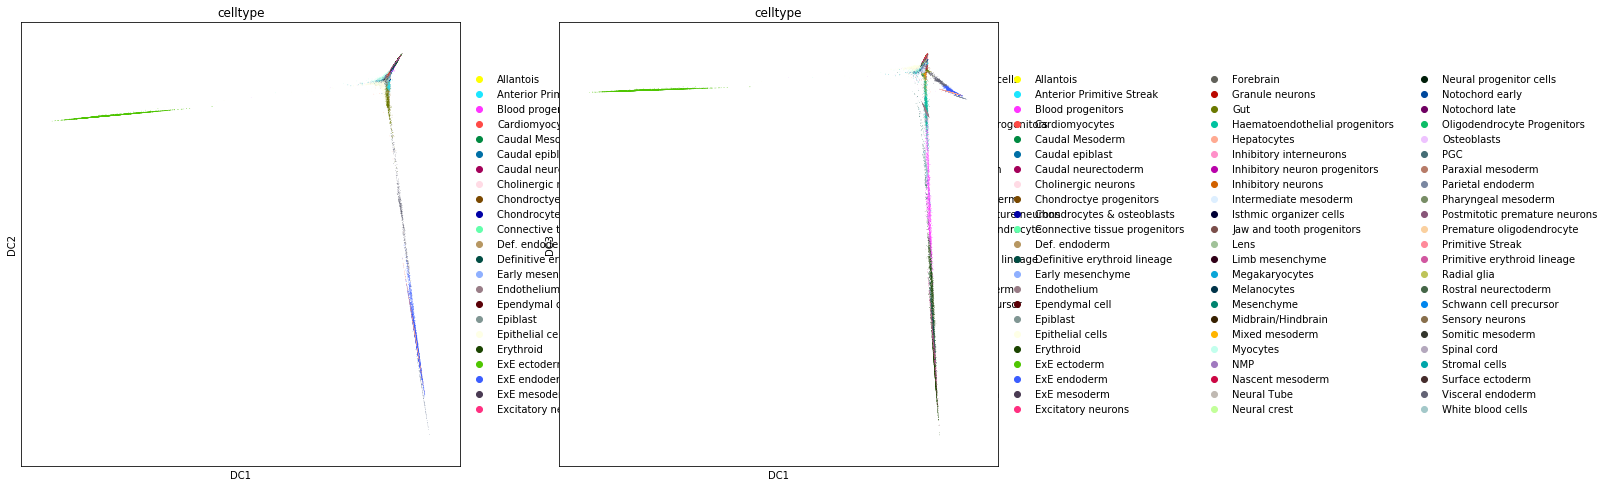

In [38]:
sc.pl.umap(adata, color='celltype', )
sc.pl.umap(adata, color=['stage', 'day'])
sc.pl.diffmap(adata, color='celltype', components=['1,2','1,3'])

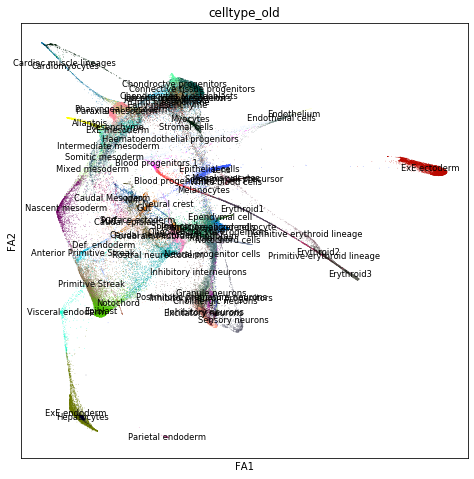

In [27]:
sc.pl.draw_graph(adata, color='celltype_old', save = '_embryo_celltype.pdf', legend_loc='on data', legend_fontweight='normal', legend_fontsize='small')

## Neuroectoderm trajectory

In [39]:
# Subsetting adata to only the clusters included in the trajectory
adata_neuro = adata[adata.obs['celltype'].isin(['Epiblast', 'Primitive Streak', 'Rostral neurectoderm', 
                                                'Caudal neurectoderm', 'Surface actoderm', 'PGC', 
                                                'Midbrain/Hindbrain', 'Neural crest', 'Spinal cord',
                                                'Forebrain', 'Notochord late', 'Caudal epiblast', 'Neural Tube', 
                                                'Oligodendrocyte Progenitors', 'Radial glia', 'Isthmic organizer cells',
                                                'Ependymal cell', 'Anterior Primitive Streak', 'Premature oligodendrocyte',
                                                'Schwann cell precursor', 'NMP', 'Neural progenitor cells', 'Granule neurons',
                                                'Cholinergic neurons', 'Postmitotic premature neurons', 'Excitatory neurons', 
                                                'Inhibitory neurons', 'Inhibitory interneurons', 'Inhibitory neuron progenitors',
                                                'Sensory neurons'])]


In [48]:
sc.pp.neighbors(adata_neuro)

sc.tl.draw_graph(adata_neuro)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:11)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:09:09)


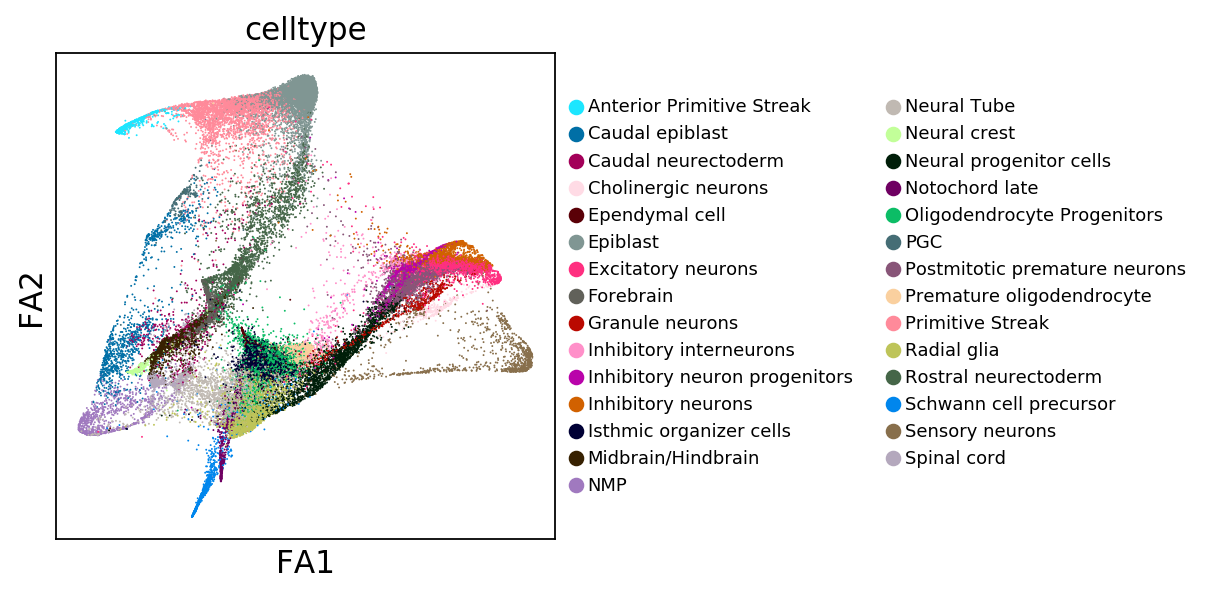

In [74]:
sc.pl.draw_graph(adata_neuro, color='celltype', save='_neuroectoderm',  legend_fontsize='xx-small', legend_fontweight='normal')

### PAGA and DPT

In [50]:
sc.tl.paga(adata_neuro, groups='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:04)


/opt/conda/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):


--> added 'pos', the PAGA positions (adata.uns['paga'])


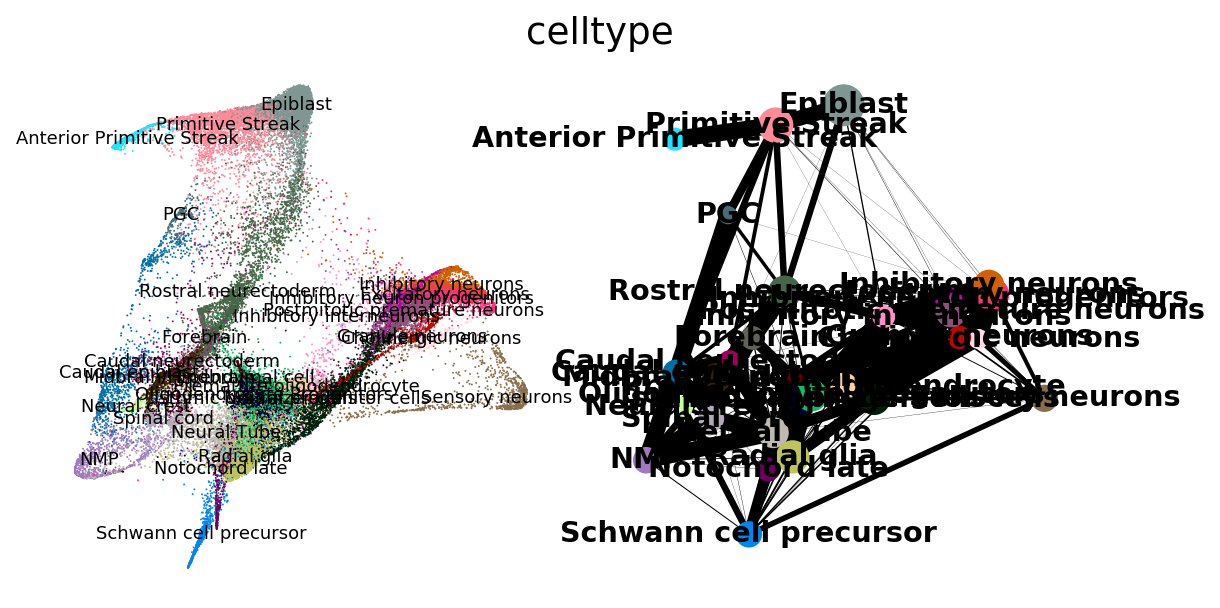

In [58]:
sc.pl.paga_compare(adata_neuro, color='celltype', save='_neuroectoderm', legend_fontsize='xx-small', legend_fontweight='normal')

--> added 'pos', the PAGA positions (adata.uns['paga'])


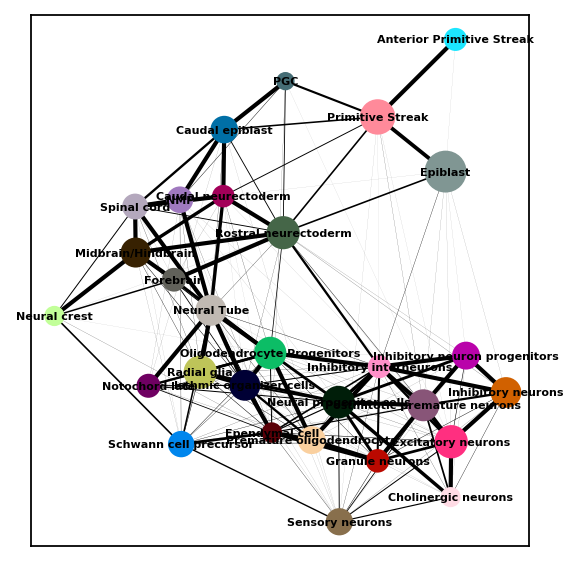

In [75]:
sc.pl.paga(adata_neuro, color='celltype', fontsize=5, edge_width_scale=0.25, save='_neuroectoderm')

--> added 'pos', the PAGA positions (adata.uns['paga'])


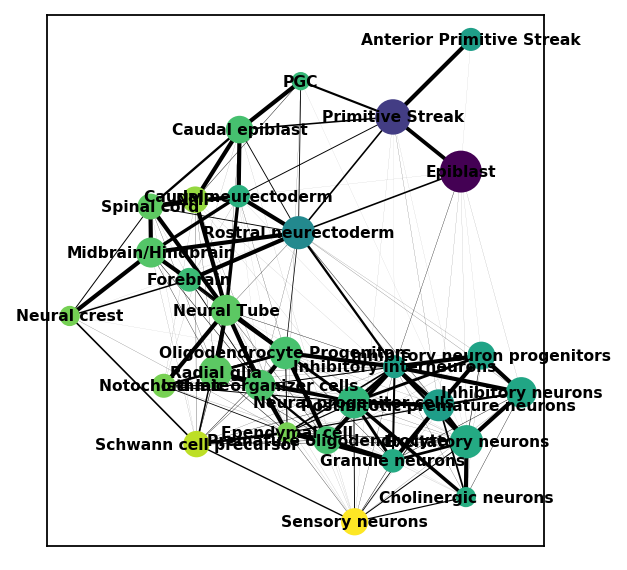

In [73]:
sc.pl.paga(adata_neuro, color='dpt_pseudotime',fontsize=7, edge_width_scale=0.25, save='dpt_neuroectoderm')

In [53]:
# Calculate pseudotime with DPT
adata_neuro.uns['iroot'] = np.flatnonzero(adata_neuro.obs['stage'] == 'E6.5')[0]
sc.tl.dpt(adata_neuro, n_branchings=0, n_dcs=15)

computing Diffusion Pseudotime using n_dcs=15
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


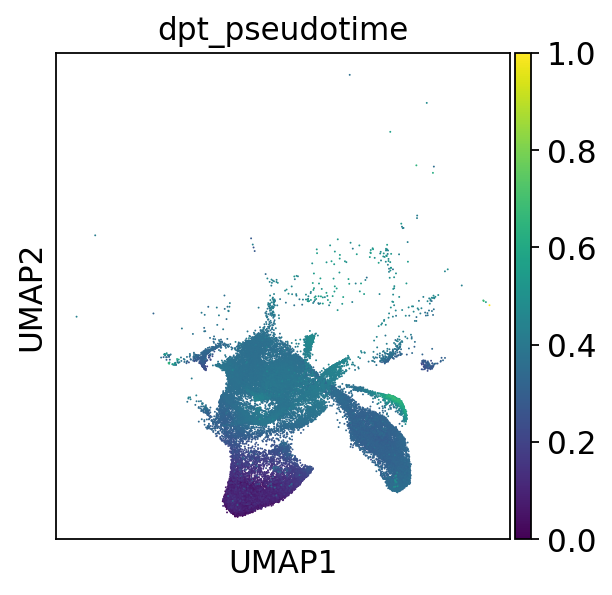

In [55]:
sc.pl.umap(adata_neuro, color='dpt_pseudotime', save='dpt_neuroectoderm')

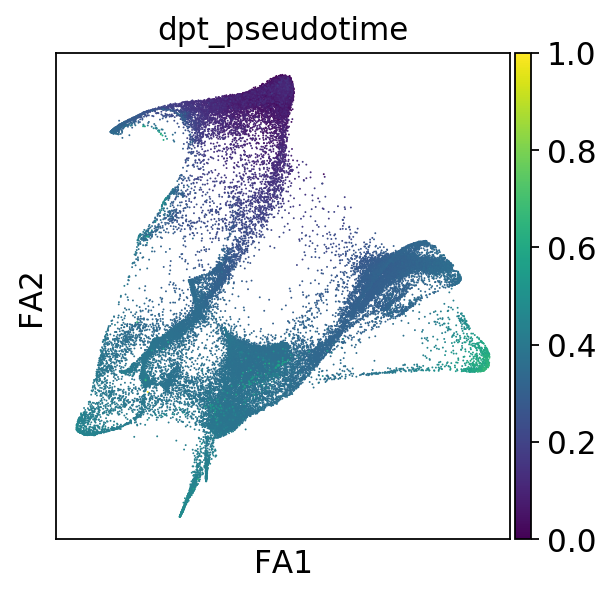

In [56]:
sc.pl.draw_graph(adata_neuro, color='dpt_pseudotime', save='dpt_neuroectoderm')